# Air Quality and Pollution Assessment using Machine learning Models

Air quality assessment is vital for public health and environmental sustainability. This project evaluates air quality by analyzing key environmental parameters and pollutant concentrations. Various machine learning models, including K-Nearest Neighbors (KNN), Random Forest, Decision Tree, and Logistic Regression, were implemented to classify air quality into predefined categories. The comparative analysis of these models aims to identify the most effective approach for accurate air quality prediction and support data-driven decision-making in pollution management.

1) Temperature (°C): Average temperature of the region.
2) Humidity (%): Relative humidity recorded in the region.
3) PM2.5 Concentration (µg/m³): Fine particulate matter levels.
4) PM10 Concentration (µg/m³): Coarse particulate matter levels.
5) NO2 Concentration (ppb): Nitrogen dioxide levels.
6) SO2 Concentration (ppb): Sulfur dioxide levels.
7) CO Concentration (ppm): Carbon monoxide levels.
8) Proximity to Industrial Areas (km): Distance to the nearest industrial zone.
9) Population Density (people/km²): Number of people per square kilometer in the region.

Target variable:Air Quality Levels
1) Good: Clean air with low pollution levels.
2) Moderate: Acceptable air quality but with some pollutants present.
3) Poor: Noticeable pollution that may cause health issues for sensitive groups.
4) Hazardous: Highly polluted air posing serious health risks to the population.

Importing Dataset and Libraries

In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
import numpy as np
df=pd.read_csv(r"E:\data_analytics\ml_works\machine_learning_projects\updated_pollution_dataset.csv")
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


Information about Data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


Finding Null Values

In [3]:
df.isna().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

Removing Space in column name

In [4]:
#replacing space
df.columns=df.columns.str.replace(" ","_")
print(df.columns)

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air_Quality'],
      dtype='object')


Removing Duplicates

In [5]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

0


Finding Unique Values

In [6]:
df['Air_Quality'].unique()

array(['Moderate', 'Good', 'Hazardous', 'Poor'], dtype=object)

Encoding Categorical data

In [7]:
#converting categorical data in to numerical data
le=LabelEncoder()
df['Air_Quality']=le.fit_transform(df['Air_Quality'])

Finding Correlation

In [8]:
corr_matrix=df.corr(numeric_only=True)
print(corr_matrix)

                               Temperature  Humidity     PM2.5      PM10  \
Temperature                       1.000000  0.466456  0.323840  0.425690   
Humidity                          0.466456  1.000000  0.273366  0.359156   
PM2.5                             0.323840  0.273366  1.000000  0.973005   
PM10                              0.425690  0.359156  0.973005  1.000000   
NO2                               0.591969  0.491977  0.333004  0.439916   
SO2                               0.568082  0.459804  0.299582  0.401849   
CO                                0.685258  0.567540  0.395179  0.518895   
Proximity_to_Industrial_Areas    -0.589564 -0.479646 -0.315766 -0.425018   
Population_Density                0.481692  0.411630  0.278957  0.365734   
Air_Quality                       0.501446  0.430633  0.268432  0.366493   

                                    NO2       SO2        CO  \
Temperature                    0.591969  0.568082  0.685258   
Humidity                       0.4919

Heatmap plot

<Axes: >

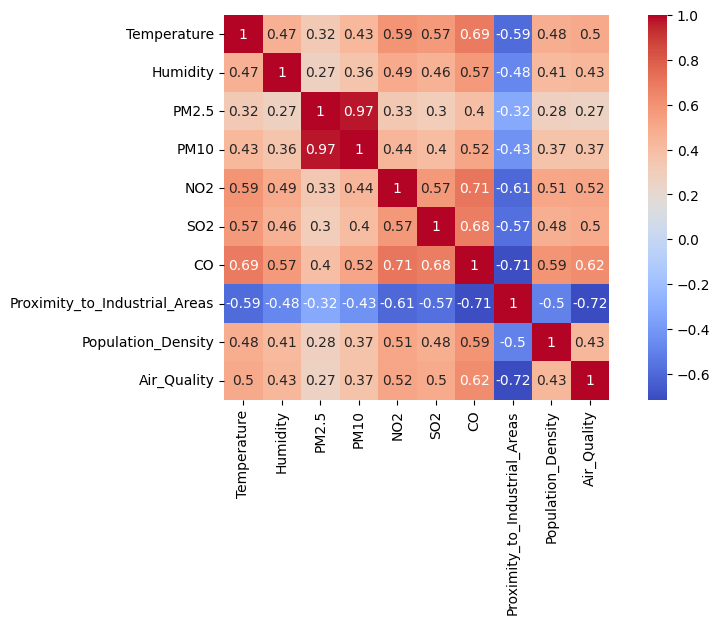

In [40]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',square=True)

Scatter plot

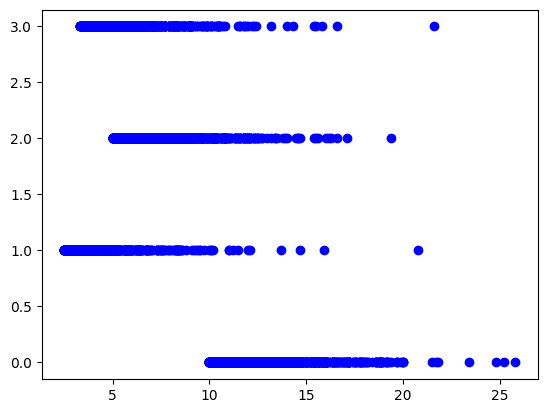

In [10]:
#Plotting
plt.scatter(df['Proximity_to_Industrial_Areas'],df['Air_Quality'],color='blue')
plt.show()

Independent and Dependent Variables

In [11]:
x=df.iloc[:,1:9].values
x=pd.DataFrame(x)
y=df.iloc[:,9].values
y=pd.DataFrame(y)
print(x)
print(y)

         0      1      2     3     4     5     6      7
0     59.1    5.2   17.9  18.9   9.2  1.72   6.3  319.0
1     75.6    2.3   12.2  30.8   9.7  1.64   6.0  611.0
2     74.7   26.7   33.8  24.4  12.6  1.63   5.2  619.0
3     39.1    6.1    6.3  13.5   5.3  1.15  11.1  551.0
4     70.7    6.9   16.0  21.9   5.6  1.01  12.7  303.0
...    ...    ...    ...   ...   ...   ...   ...    ...
4995  74.1  116.0  126.7  45.5  25.7  2.11   2.8  765.0
4996  96.9    6.9   25.0  25.3  10.8  1.54   5.7  709.0
4997  78.2   14.2   22.1  34.8   7.8  1.63   9.6  379.0
4998  44.4   21.4   29.0  23.7   5.7  0.89  11.6  241.0
4999  77.9   81.7   94.3  23.2  10.5  1.38   8.3  461.0

[5000 rows x 8 columns]
      0
0     2
1     2
2     2
3     0
4     0
...  ..
4995  1
4996  2
4997  2
4998  0
4999  2

[5000 rows x 1 columns]


Splitting variables to test and train

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### KNN Model

In [12]:
from sklearn.neighbors import KNeighborsClassifier

Feature Scaling

In [14]:
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)
print(x_train)

[[ 1.41204699 -0.48178234 -0.05266199 ...  1.27823849 -1.25468399
   1.30618379]
 [-1.00679356 -0.77737332 -0.72482035 ... -1.01424265  0.45834605
  -1.19352042]
 [ 2.59627101 -0.80533463 -0.7787368  ...  1.14882423 -0.20476235
   1.66608885]
 ...
 [-0.15641993 -0.03839587  0.16659822 ...  0.76058146 -0.6192051
  -0.49988522]
 [ 0.3978977  -0.20216925 -0.30067764 ... -0.9957549   2.1713761
  -0.51297268]
 [ 2.07974776  0.35306246  0.42180274 ...  3.45979312 -1.30994302
   0.75651061]]


Model Fitting

In [15]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

Model Prediction

In [16]:
y_pred=classifier.predict(x_test)
print(y_pred)
print(y_test)

[1 0 2 1 0 3 0 0 0 2 3 0 1 0 2 0 0 0 2 3 0 0 3 2 0 3 0 0 2 0 0 3 2 2 2 2 2
 2 2 0 3 2 1 0 0 2 2 3 0 0 2 0 0 0 0 2 1 2 3 0 0 0 0 2 0 3 3 0 2 2 0 0 2 0
 0 2 2 2 0 0 0 3 3 0 2 2 1 2 2 1 2 0 0 3 2 2 2 0 2 0 1 2 3 2 1 0 0 0 2 0 2
 2 2 0 2 3 1 0 0 0 2 2 2 2 3 0 2 2 0 0 2 0 3 0 2 2 0 0 2 0 0 2 0 0 2 2 1 0
 2 2 3 3 2 0 0 3 2 2 2 2 3 0 2 1 3 2 0 0 0 0 2 3 0 1 0 0 0 2 0 3 3 0 2 0 0
 3 0 0 0 0 1 3 2 3 2 2 1 3 3 3 0 0 2 2 0 0 0 2 0 0 0 0 3 2 2 2 2 3 0 1 0 2
 0 2 0 2 1 3 2 0 0 0 0 0 0 3 0 3 3 2 2 0 2 3 0 2 0 0 0 0 2 2 0 1 3 3 0 0 1
 3 0 2 0 3 0 2 3 3 2 0 2 2 2 0 1 3 2 0 3 0 1 0 0 3 2 0 3 2 0 2 2 1 0 0 2 2
 2 2 2 0 2 2 0 2 3 2 0 2 1 0 0 0 0 0 0 3 2 0 2 0 2 2 2 2 0 1 3 2 0 2 0 3 3
 3 2 2 0 0 3 3 0 3 2 1 2 2 0 2 0 0 3 2 0 2 0 0 0 1 0 0 0 0 2 2 0 2 0 0 2 2
 2 2 3 0 0 2 3 0 2 0 2 0 0 0 0 3 2 0 3 2 2 2 2 2 0 0 2 1 0 0 0 0 3 3 0 0 3
 0 3 0 2 2 1 0 3 0 0 1 0 0 3 3 0 2 0 3 2 3 2 2 0 2 1 2 2 0 0 3 3 3 3 0 0 1
 2 0 2 2 0 3 0 0 0 3 1 3 0 2 0 0 0 3 3 1 0 3 0 0 2 2 0 2 2 0 0 2 3 0 2 3 0
 0 2 3 0 0 2 0 2 2 2 0 0 

Evaluating Model Performance

In [17]:
print("mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))
print("mean squared error:",metrics.mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mean absolute error: 0.136
mean squared error: 0.246
root mean squared error: 0.49598387070548977


Prediction Accuracy

In [18]:
accuracy=metrics.accuracy_score(y_test,y_pred)
print(accuracy*100,"%")

91.8 %


### SVM Model

In [19]:
from sklearn.svm import SVC

Model Fitting

In [20]:
classifier=SVC(kernel='linear',random_state=42)
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

Model Prediction

In [21]:
y_pred=classifier.predict(x_test)
print(y_pred)
print(y_test)

[1 0 2 1 0 3 0 0 0 2 3 0 1 0 2 0 0 0 2 3 0 0 3 2 0 3 0 0 2 2 0 3 2 3 2 2 2
 2 2 0 3 2 1 0 0 2 2 3 0 0 2 0 0 0 0 3 1 2 3 0 0 0 0 2 0 3 3 0 2 2 0 0 3 0
 0 2 2 2 0 0 0 3 3 0 2 2 3 2 2 1 2 0 0 3 2 2 2 0 3 0 1 2 3 2 1 0 0 0 2 0 2
 2 2 0 2 3 1 0 0 0 2 3 2 2 3 0 2 2 0 0 2 0 3 0 2 2 0 0 2 0 0 2 0 0 2 2 1 0
 2 2 3 3 3 0 0 3 2 2 2 2 1 0 2 1 3 2 0 0 0 0 2 3 0 1 0 0 0 2 0 3 3 0 2 0 0
 3 0 0 0 0 1 1 2 3 2 2 1 3 3 3 0 0 2 2 0 0 0 2 0 0 0 0 3 2 2 2 2 2 0 1 0 2
 0 2 0 2 1 3 2 0 0 0 0 0 0 3 0 3 3 2 2 0 2 1 0 2 0 0 0 0 2 2 0 1 3 3 0 0 1
 3 0 2 0 1 0 2 3 3 2 0 2 2 2 0 3 1 2 0 3 0 1 0 0 3 2 0 3 2 0 2 2 3 0 0 2 2
 2 2 2 0 2 2 0 2 3 2 0 2 3 0 0 0 0 2 0 1 2 0 2 0 2 3 2 2 0 1 1 2 0 2 0 3 3
 3 2 2 0 0 3 3 0 3 2 1 2 2 0 2 0 0 1 2 0 2 0 0 0 1 0 0 0 0 2 2 0 2 0 2 2 2
 2 2 3 0 0 2 3 0 2 0 3 0 0 0 0 3 2 0 3 2 2 2 2 2 0 0 2 1 0 0 0 0 3 3 0 0 3
 0 3 0 2 2 1 0 3 0 0 1 0 0 3 3 0 2 0 3 2 3 3 3 0 2 1 2 2 0 0 3 3 3 3 0 0 1
 2 0 2 2 0 3 0 0 0 3 1 3 0 2 0 0 0 3 3 1 0 3 0 0 2 2 0 2 2 0 0 2 3 0 2 3 0
 0 2 3 0 0 2 0 2 2 3 0 0 

Model Evaluation

In [22]:
print("mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))
print("mean squared error:",metrics.mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mean absolute error: 0.112
mean squared error: 0.19
root mean squared error: 0.43588989435406733


Prediction Accuracy

In [23]:
accuracy=metrics.accuracy_score(y_test,y_pred)
print(accuracy*100,"%")

92.7 %


### Decision Tree model

In [24]:
from sklearn.tree import DecisionTreeClassifier

Model fitting

In [25]:
classifier=DecisionTreeClassifier(criterion='entropy',random_state=42)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

Model Prediction

In [26]:
y_pred=classifier.predict(x_test)
print(y_pred)
print(y_test)

[1 0 0 1 0 1 0 0 0 2 3 0 3 0 2 0 0 0 2 1 0 0 3 2 0 3 0 0 2 2 0 3 2 2 2 3 2
 2 2 0 3 3 1 0 0 2 2 3 0 0 2 0 0 0 0 2 1 2 1 0 0 0 0 2 0 1 3 0 2 2 0 0 3 0
 0 2 2 2 0 0 0 3 3 0 2 2 3 2 3 3 2 0 0 3 3 2 2 0 3 0 1 2 2 2 1 0 0 0 2 0 3
 2 2 0 2 3 1 0 0 0 2 2 3 2 3 0 2 2 0 0 2 0 3 0 2 2 0 0 2 0 0 2 0 0 2 2 1 0
 2 2 3 3 2 0 0 3 2 2 2 2 3 0 2 1 3 2 0 0 0 0 2 3 0 1 0 0 0 2 0 3 3 0 3 0 0
 3 0 0 0 0 1 1 2 1 2 2 3 1 3 3 0 0 2 2 0 0 0 2 0 0 0 0 3 2 2 2 2 3 0 1 0 2
 0 2 0 2 1 1 2 0 0 0 0 0 0 1 0 3 1 2 2 0 2 3 0 2 0 0 0 0 2 2 0 1 3 3 0 0 1
 3 0 2 0 1 0 2 3 3 2 0 2 2 2 0 1 1 2 0 3 0 1 0 0 3 2 0 3 2 0 2 2 1 0 0 2 2
 3 2 2 0 2 2 0 2 3 2 0 2 3 0 0 0 0 2 0 3 2 0 3 0 2 3 2 3 0 1 1 2 0 2 0 3 3
 3 2 2 0 0 3 3 0 3 2 1 2 2 0 2 0 0 3 2 0 2 0 0 0 1 0 0 0 0 2 2 0 2 0 0 2 2
 2 2 3 0 0 2 3 0 2 0 3 0 0 0 0 3 2 0 3 2 2 2 2 2 0 0 2 1 0 0 0 0 3 3 0 0 1
 0 3 0 2 2 1 0 3 0 0 1 0 0 3 3 0 2 0 2 2 3 3 3 0 2 1 2 2 0 0 3 3 3 3 0 0 1
 2 0 2 2 0 3 0 0 0 3 1 1 0 2 0 0 0 3 3 1 0 3 0 0 2 3 0 2 2 0 0 2 3 0 2 3 0
 0 2 3 0 0 2 0 2 2 2 0 0 

Model Evaluation

In [27]:
print("mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))
print("mean squared error:",metrics.mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mean absolute error: 0.128
mean squared error: 0.216
root mean squared error: 0.46475800154489


Prediction Accuracy

In [28]:
accuracy=metrics.accuracy_score(y_test,y_pred)
print(accuracy*100,"%")

91.60000000000001 %


### Random Forest Model

In [29]:
from sklearn.ensemble import RandomForestClassifier

Model fitting

In [30]:
classifier=RandomForestClassifier(criterion='entropy',n_estimators=10,random_state=42)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

Model Prediction

In [31]:
y_pred=classifier.predict(x_test)
print(y_test)
print(y_pred)

      0
1501  1
2586  0
2653  2
1055  1
705   0
...  ..
4711  2
2313  0
3214  3
2732  2
1926  3

[1000 rows x 1 columns]
[1 0 2 1 0 1 0 0 0 2 2 0 1 0 2 0 0 0 2 3 0 0 3 2 0 3 0 0 2 2 0 3 2 2 2 2 2
 2 2 0 3 2 1 0 0 2 2 3 0 0 3 0 0 0 0 2 1 2 3 0 0 0 0 2 0 1 3 0 2 2 0 0 2 0
 0 2 2 2 0 0 0 3 3 0 2 2 1 2 2 1 2 0 0 3 3 2 2 0 3 0 1 2 2 2 1 0 0 0 2 0 2
 2 2 0 2 3 1 0 0 2 2 2 3 2 3 0 2 2 0 0 2 0 3 0 2 2 0 0 2 0 0 2 0 0 2 2 1 0
 2 2 3 3 3 0 0 3 2 2 2 2 1 0 2 1 3 2 0 0 0 0 2 3 0 1 0 0 0 2 0 3 3 0 2 0 0
 3 0 0 0 0 1 1 2 1 2 2 3 1 3 3 0 0 2 2 0 0 0 2 0 0 0 0 3 2 2 2 2 2 0 1 0 2
 0 2 0 2 1 1 2 0 0 0 0 0 0 3 0 3 1 2 2 0 2 3 0 2 0 0 0 0 2 2 0 1 3 3 0 0 1
 3 0 2 0 3 0 2 3 3 2 0 2 2 2 0 1 1 2 0 3 0 1 0 0 3 2 0 3 2 0 2 2 1 0 0 2 2
 2 2 2 0 2 2 0 2 3 2 0 2 3 0 0 0 0 3 0 3 2 0 2 0 2 2 2 2 0 1 1 2 0 2 0 3 3
 3 2 2 0 0 3 3 0 3 2 1 2 2 0 2 0 0 3 2 0 2 0 0 0 1 0 0 0 0 2 2 0 2 0 0 2 2
 2 2 3 0 0 2 3 0 2 0 3 0 0 0 0 3 2 0 3 2 2 2 2 2 0 0 2 1 0 0 0 0 3 3 0 0 3
 0 3 0 2 2 1 0 3 0 0 1 0 0 3 3 0 2 0 3 2 3 2 3 0 2 1 2

Model Evaluation

In [32]:
print("mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))
print("mean squared error:",metrics.mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mean absolute error: 0.096
mean squared error: 0.172
root mean squared error: 0.4147288270665544


Prediction Accuracy

In [33]:
accuracy=metrics.accuracy_score(y_test,y_pred)
print(accuracy*100,"%")

94.19999999999999 %


### Logistic Regression Model

In [34]:
from sklearn.linear_model import LogisticRegression

Model Fitting

In [35]:
model=LogisticRegression(max_iter=1000)
model.fit(x_test,y_test)

LogisticRegression(max_iter=1000)

Model Prediction

In [36]:
y_pred=model.predict(x_test)
print(y_test)
print(y_pred)

      0
1501  1
2586  0
2653  2
1055  1
705   0
...  ..
4711  2
2313  0
3214  3
2732  2
1926  3

[1000 rows x 1 columns]
[1 0 2 1 0 1 0 0 0 2 3 0 1 0 2 0 0 0 2 3 0 0 3 2 0 3 0 0 2 0 0 3 2 3 2 2 2
 2 2 0 3 2 1 0 0 2 2 3 0 0 2 0 0 0 0 2 1 2 3 0 0 0 0 2 0 3 3 0 2 2 0 0 3 0
 0 2 2 2 0 0 0 3 3 0 2 2 3 2 2 1 2 0 0 3 2 2 2 0 3 0 1 2 3 2 1 0 0 0 2 0 2
 2 2 0 2 3 1 0 0 0 2 2 2 2 3 0 2 2 0 0 2 0 3 0 2 2 0 0 2 0 0 2 0 0 2 2 1 0
 2 2 3 3 3 0 0 3 2 2 2 2 1 0 2 1 1 2 0 0 0 0 2 3 0 1 0 0 0 2 0 3 3 0 2 0 0
 3 0 0 0 0 1 1 2 3 2 2 1 3 3 3 0 0 2 2 0 0 0 2 0 0 0 0 3 2 2 2 2 3 0 1 0 2
 0 2 0 2 1 3 2 0 0 0 0 0 0 3 0 3 1 2 2 0 2 1 0 2 0 0 0 0 2 2 0 1 3 3 0 0 1
 3 0 2 0 1 0 2 3 3 2 0 2 2 2 0 3 1 2 0 3 0 1 0 0 3 2 0 3 2 0 2 2 3 0 0 2 2
 2 2 2 0 2 2 0 2 3 2 0 2 3 0 0 0 0 2 0 1 2 0 2 0 2 2 2 2 0 1 1 2 0 2 0 3 3
 3 2 2 0 0 3 3 0 3 2 1 2 2 0 2 0 0 3 2 0 2 0 0 0 1 0 0 0 0 2 2 0 2 0 0 2 2
 2 2 3 0 0 2 3 0 2 0 3 0 0 0 0 3 2 0 3 2 2 2 2 2 0 0 2 1 0 0 0 0 3 3 0 0 3
 0 3 0 2 2 1 0 3 0 0 1 0 0 3 3 0 2 0 2 2 3 2 3 0 2 1 2

Model Evaluation

In [37]:
print("mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))
print("mean squared error:",metrics.mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mean absolute error: 0.105
mean squared error: 0.177
root mean squared error: 0.4207136793592526


Prediction Accuracy

In [38]:
score=metrics.accuracy_score(y_test,y_pred)
print(score*100,"%")

93.10000000000001 %


Conclusion:
In this project, various machine learning models, including K-Nearest Neighbors (KNN), Random Forest, Decision Tree, and Logistic Regression, were applied to assess air quality based on environmental and pollutant data. Among the models tested, the Random Forest model demonstrated the highest accuracy at 94.20%, showcasing its robustness and reliability in predicting air quality levels. This strong performance highlights the potential of the Random Forest model as an effective tool for environmental monitoring and supporting initiatives to improve air quality and public health.